来源 https://mp.weixin.qq.com/s/DY_K1CisYElFL7Tt0Si6hw

# 1 导入库

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

# 2 关联（Correlation）关系图

## 2.1 散点图（Scatter plot）
该图展示两个变量间的关系，matplotlib中使用plt.scatter()函数。当数据包含多组时，可以使用不同颜色或者形状区分

E:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


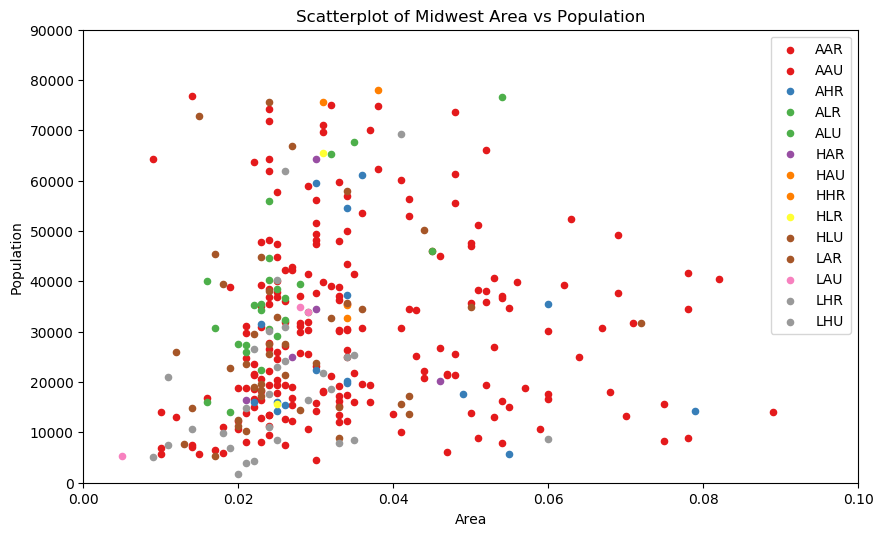

In [4]:
# Import dataset
midwest = pd.read_csv("E:/git/python_Visualization-example/datasets/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [
    plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))
]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area',
                'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s=20,
                c=colors[i],
                label=str(category))

# Decorations
plt.gca().set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Area', fontdict={'fontsize': 10})
plt.ylabel('Population', fontdict={'fontsize': 10})
plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)
plt.legend(fontsize=10)
plt.show()

## 2.2 边界气泡图（Bubble plot with Encircling）
此图为散点图，使用边界圈住一部分点，以强调其重要性。

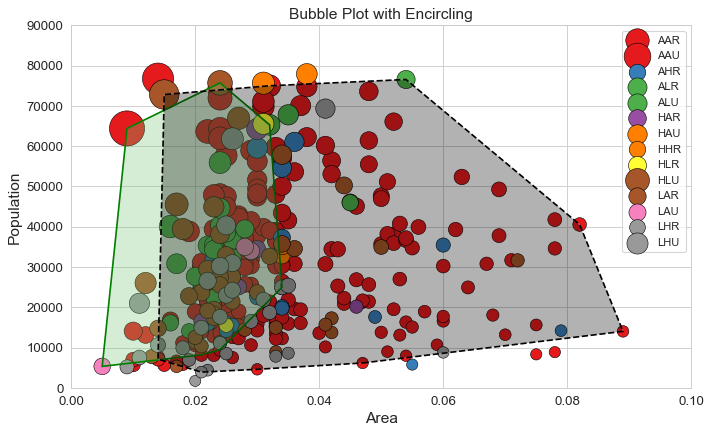

In [10]:
from matplotlib import patches
from scipy.spatial import ConvexHull  #更多参考scipy.spatial.ConvexHull
sns.set_style("whitegrid")

# Step 1: Prepare Data
midwest = pd.read_csv("E:/git/python_Visualization-example/datasets/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [
    plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))
]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area',
                'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s='dot_size',
                c=colors[i],
                label=str(category),
                edgecolors='black',
                linewidths=.5)


# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):  #定义encircle函数，圈出重点关注的点
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data1 = midwest.loc[midwest.state == 'IN', :]
encircle(midwest_encircle_data1.area,
         midwest_encircle_data1.poptotal,
         ec="pink",
         fc="#74C476",
         alpha=0.3)
encircle(midwest_encircle_data1.area,
         midwest_encircle_data1.poptotal,
         ec="g",
         fc="none",
         linewidth=1.5)

midwest_encircle_data6 = midwest.loc[midwest.state == 'WI', :]
encircle(midwest_encircle_data6.area,
         midwest_encircle_data6.poptotal,
         ec="pink",
         fc="black",
         alpha=0.3)
encircle(midwest_encircle_data6.area,
         midwest_encircle_data6.poptotal,
         ec="black",
         fc="none",
         linewidth=1.5,
         linestyle='--')

# Step 4: Decorations
plt.gca().set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Area', fontdict={'fontsize': 14})
plt.ylabel('Population', fontdict={'fontsize': 14})
plt.title("Bubble Plot with Encircling", fontsize=14)
plt.legend(fontsize=10)
plt.show()

## 2.3 散点图添加趋势线（Scatter plot with linear regression line of best fit）

E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 3000x2000 with 0 Axes>

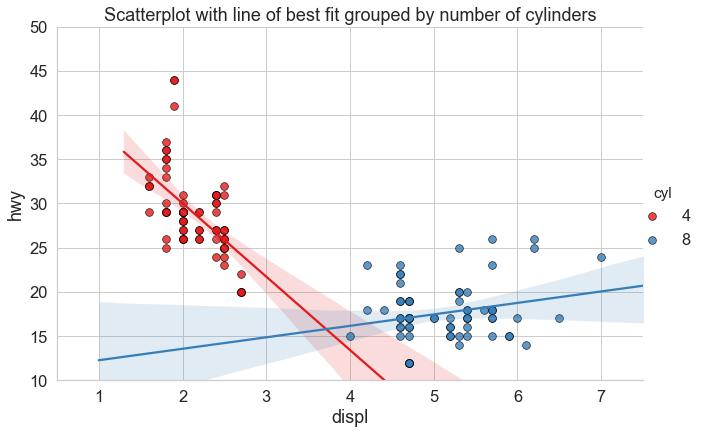

In [5]:
# Import Data
plt.figure(dpi=500)
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot

gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df_select,
    height=7,
    aspect=1.6,  #robust=True, 
    palette='Set1',
    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 50))
gridobj.fig.set_size_inches(10, 6)
plt.title("Scatterplot with line of best fit grouped by number of cylinders")
plt.show()

## 2.4 分面散点图添加趋势线（Each regression line in its own column）
添加趋势线反映两个变量是正相关、负相关或者无相关关系。

E:\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1200x800 with 0 Axes>

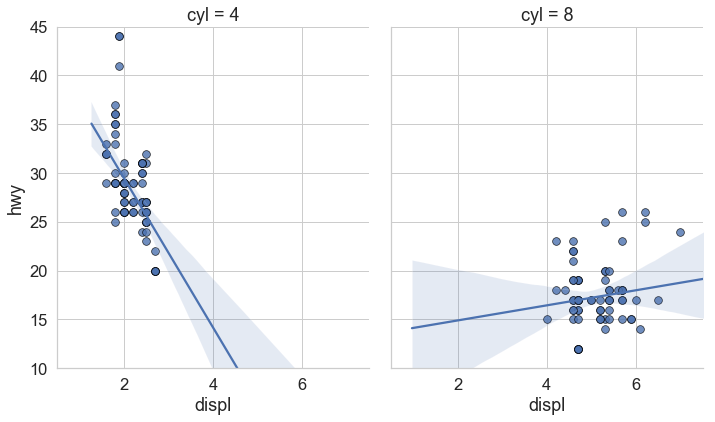

In [6]:
# Import Data
plt.figure(dpi=200)

df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Each line in its own column
gridobj = sns.lmplot(x="displ",
                     y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 45))
gridobj.fig.set_size_inches(10, 6)
plt.show()

## 2.5 抖动图（Jittering with stripplot）

多个点具有完全相同的X和Y值, 为避免多个点相互绘制并隐藏，可稍微抖动点，以便直观地看到它们。

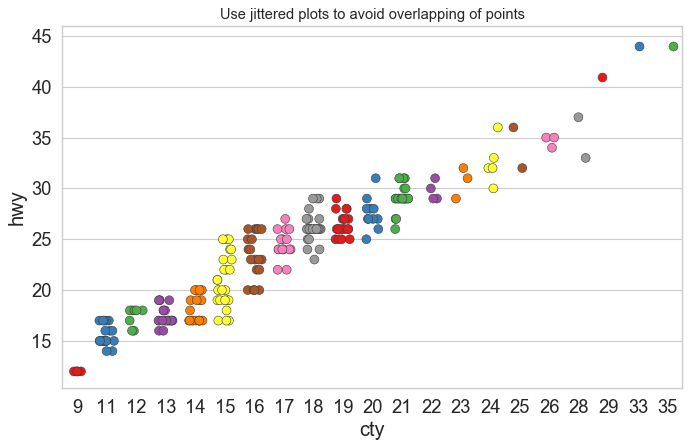

In [7]:
# Import Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(df.cty,
              df.hwy,
              jitter=0.25,
              size=8,
              ax=ax,
              linewidth=.5,
              palette='Set1')

# Decorations
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Use jittered plots to avoid overlapping of points')
plt.show()

## 2.6 计数图（Counts Plot）

区别于抖动图，多个点相互绘制并隐藏时，可使用点的大小区分重叠的程度，点的大小越大，周围的点的集中度就越大，重叠的越多。

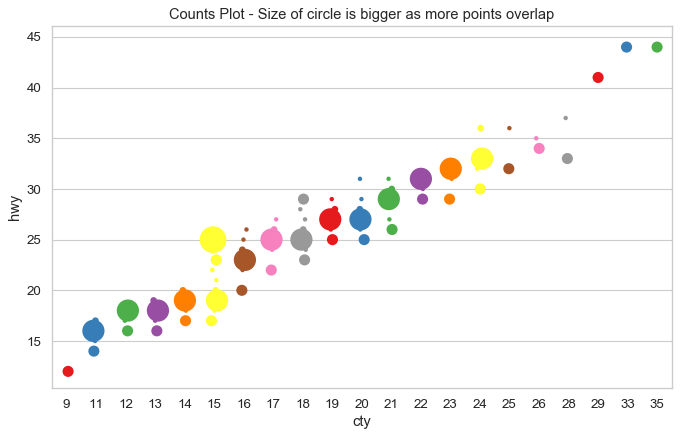

In [8]:
#友情提示：当matplotlib>=3.2出现报错ValueError: s must be a scalar, or the same size as x and y时
# Import Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(df_counts.cty,
              df_counts.hwy,
              size=df_counts.counts * 2,
              ax=ax,
              palette='Set1')

# Decorations
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Counts Plot - Size of circle is bigger as more points overlap')
plt.show()

## 2.7 边缘直方图（Marginal Histogram）

用于展示X和Y之间的关系、及X和Y的单变量分布情况，常用于数据探索分析。

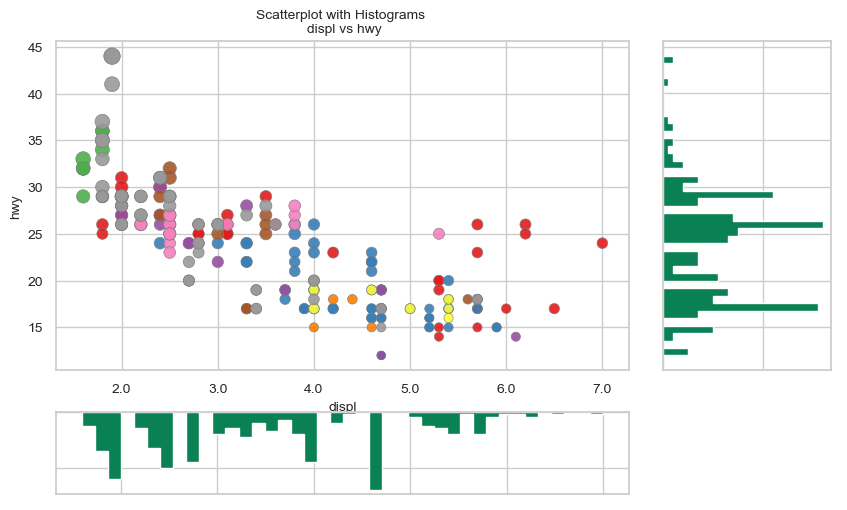

In [11]:
# Import Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 6), dpi=100)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ',
                'hwy',
                s=df.cty * 4,
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='gray',
                linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ,
               40,
               histtype='stepfilled',
               orientation='vertical',
               color='#098154')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy,
              40,
              histtype='stepfilled',
              orientation='horizontal',
              color='#098154')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')
ax_main.title.set_fontsize(10)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(10)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

方法二

E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


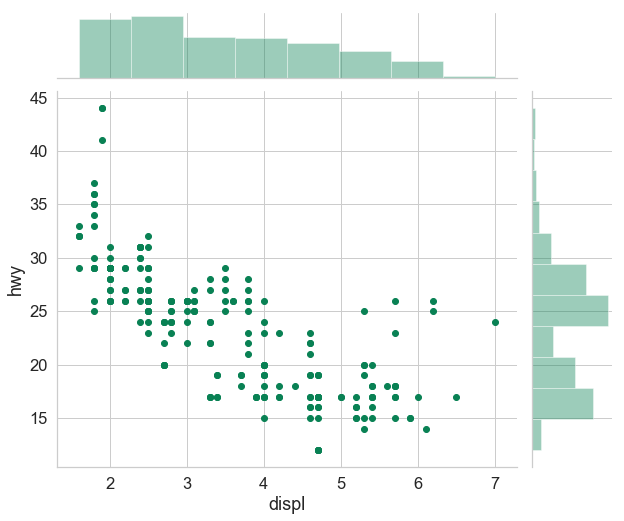

In [14]:
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")

sns.set(style="whitegrid", font_scale=1.5)  #设置主题，文本大小
g = sns.jointplot(
    x='displ',
    y='hwy',
    data=df,  #输入两个绘图变量
    color='#098154',  #修改颜色
)
g.fig.set_size_inches(10, 8)  #设置图尺寸

## 2.8 边缘箱图（Marginal Boxplot）
类似于边缘直方图，不过箱线图有助于精确定位变量的分位数。

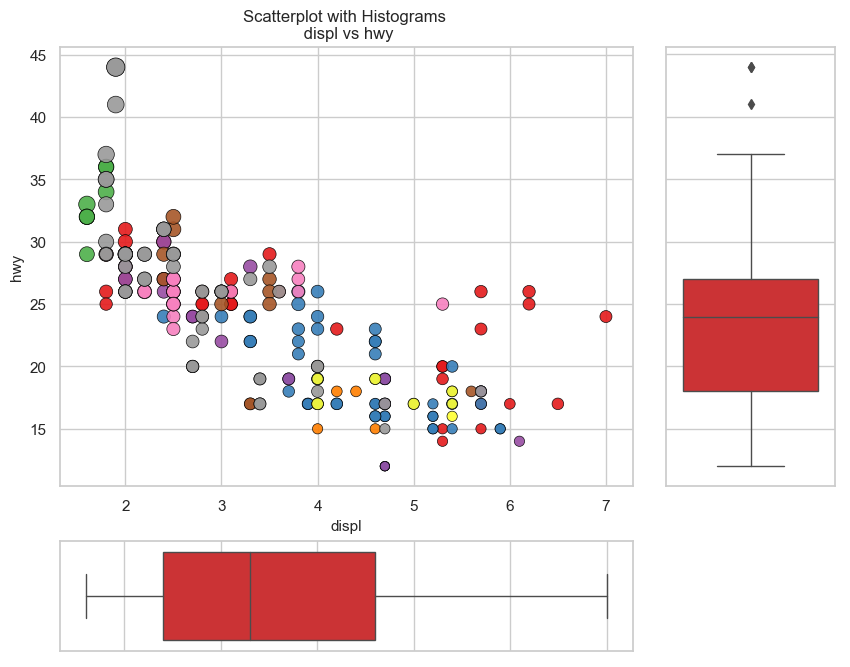

In [16]:
#中间散点图，右边和下边分别绘制y轴及x轴数据的箱图，
# Import Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi=100)
grid = plt.GridSpec(
    4, 4, hspace=0.5, wspace=0.2
)  #这里使用了matplotlib.pyplot.GridSpec分片figure，其实可以直接使用seaborn中的，前面讲过

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ',
                'hwy',
                s=df.cty * 5,
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='black',
                linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v", linewidth=1, palette='Set1')
sns.boxplot(df.displ, ax=ax_bottom, orient="h", linewidth=1, palette='Set1')

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(12)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(11)

plt.show()

## 2.9 相关性热图（Correllogram）
直观地度量给定DtaFrame (or 2D array)中所有可能的数值变量对之间的相关性差异。

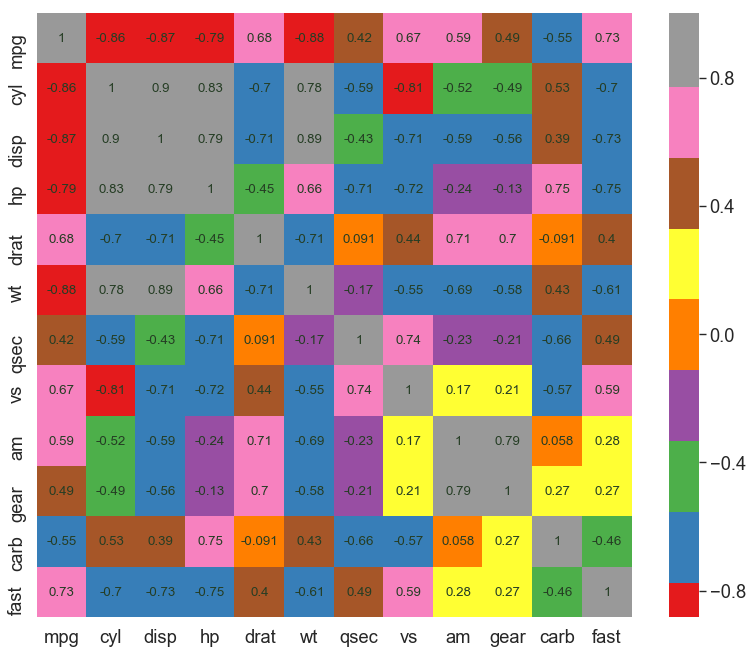

In [18]:
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mtcars.csv")
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(
    df.corr(),
    xticklabels=df.corr().columns,
    yticklabels=df.corr().columns,
    cmap='Set1',
    center=0,
    annot=True,
    annot_kws={
        'size': 12,
        'weight': 'normal',
        'color': '#253D24'
    },
)
plt.show()

# 2.10 10、矩阵图 （Pairwise Plot）
数据探索阶段必备工具，用来探索各个数值型变量之间关系。

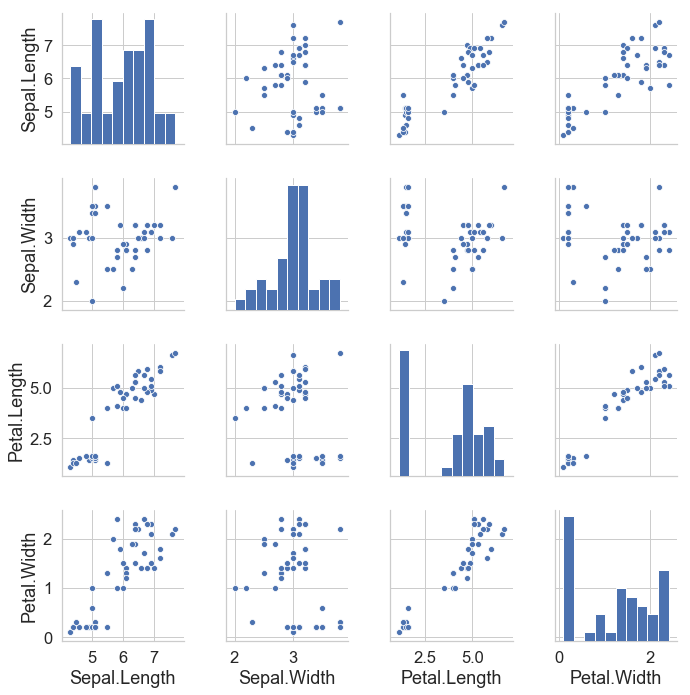

In [20]:
df = pd.read_csv("E:/git/python_Visualization-example/datasets/iris_test.csv")

# Plot

sns.pairplot(df)
plt.show()

给每个特征加入分类。

E:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 800x640 with 0 Axes>

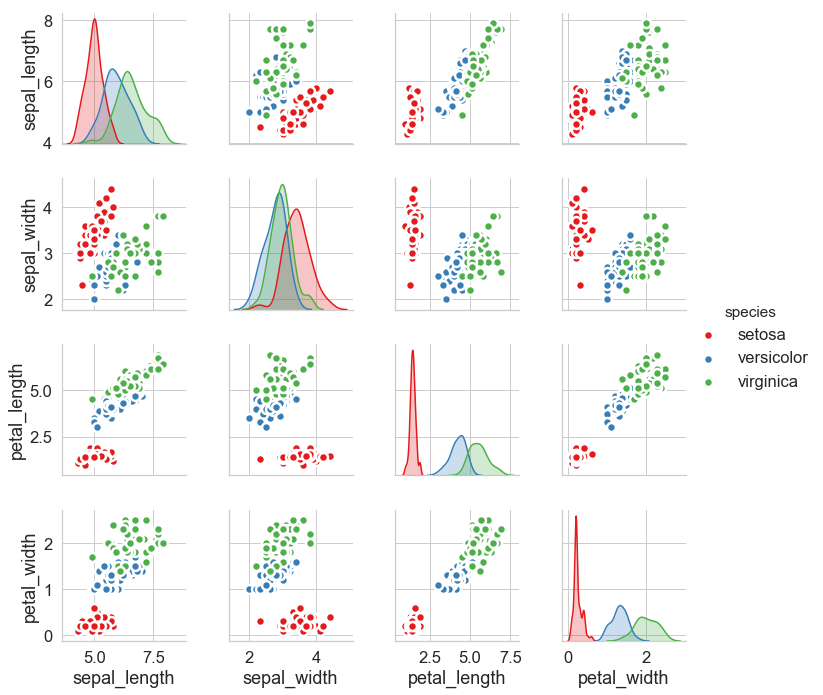

In [21]:
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df,
             kind="scatter",
             hue="species",
             palette='Set1',
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# 3 偏差 （Deviation）关系图
## 3.1 发散型柱形图 （Diverging Bars）
展示单个指标的变化的顺序和数量。

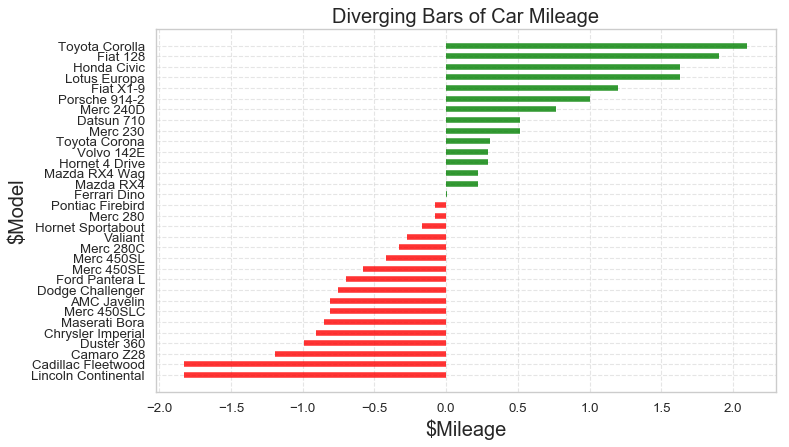

In [26]:
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(10, 6), dpi=80)
plt.hlines(y=df.index,
           xmin=0,
           xmax=df.mpg_z,
           color=df.colors,
           alpha=0.8,
           linewidth=5)

# Decorations
plt.gca().set(ylabel="$Model", xlabel="$Mileage")
plt.yticks(df.index, df.cars, fontsize=12)
plt.xticks(fontsize=12)
plt.title('Diverging Bars of Car Mileage')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 3.2 发散型文本图（Diverging Texts）-水平方向
和上一个图的区别是该图在柱子上添加了数值文本。

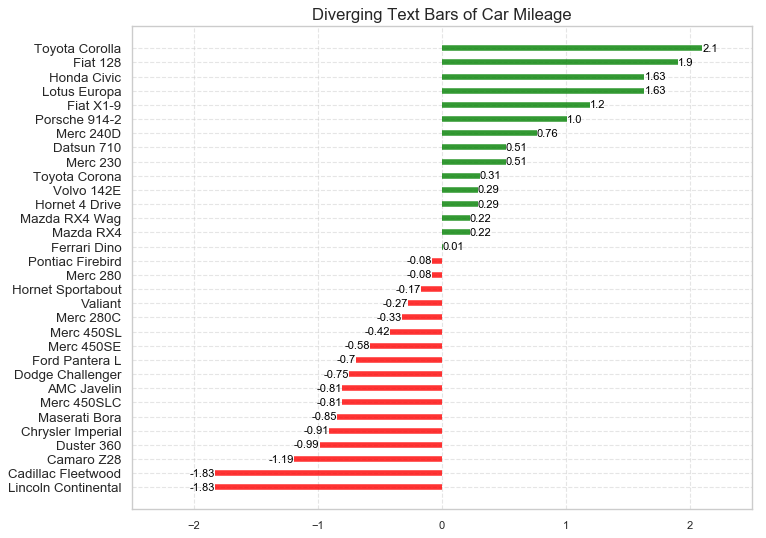

In [28]:
# Prepare Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mtcars.csv")
#df['Species'] = 
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(10,8), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z,color=df.colors, alpha=0.8, linewidth=5)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'black' if x < 0 else 'black', 'size':10})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.xticks(fontsize=10)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':15})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()
#垂直版感兴趣可以改改就可以了

## 3.3 发散型文本图（Diverging Texts）-垂直方向


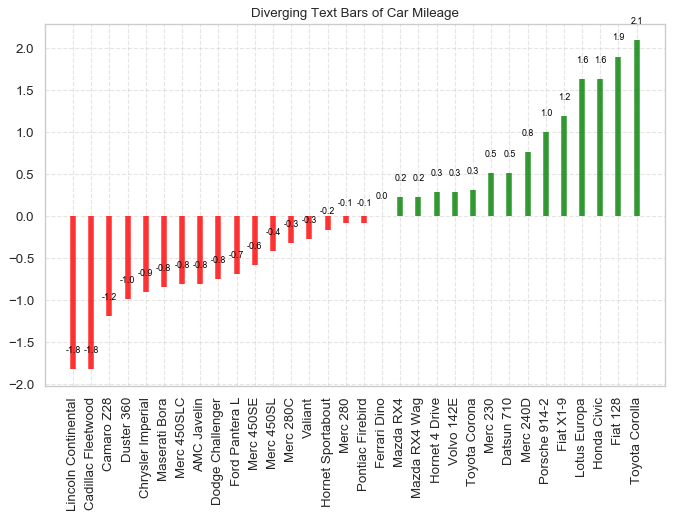

In [29]:
# Prepare Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(10, 6), dpi=80)
plt.vlines(x=df.index,
           ymin=0,
           ymax=df.mpg_z,
           color=df.colors,
           alpha=0.8,
           linewidth=5)
for y, x, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x,
                 y+0.2,
                 round(tex, 1),
                 horizontalalignment='center',
                 fontdict={
                     'color': 'black' if x < 0 else 'black',
                     'size': 8
                 })

# Decorations
plt.xticks(df.index, df.cars, fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size': 12})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 3.4 发散型点图（Diverging Dot Plot）
与发散性文本图的区别是缺失柱子，减少了组之间的对比差异。

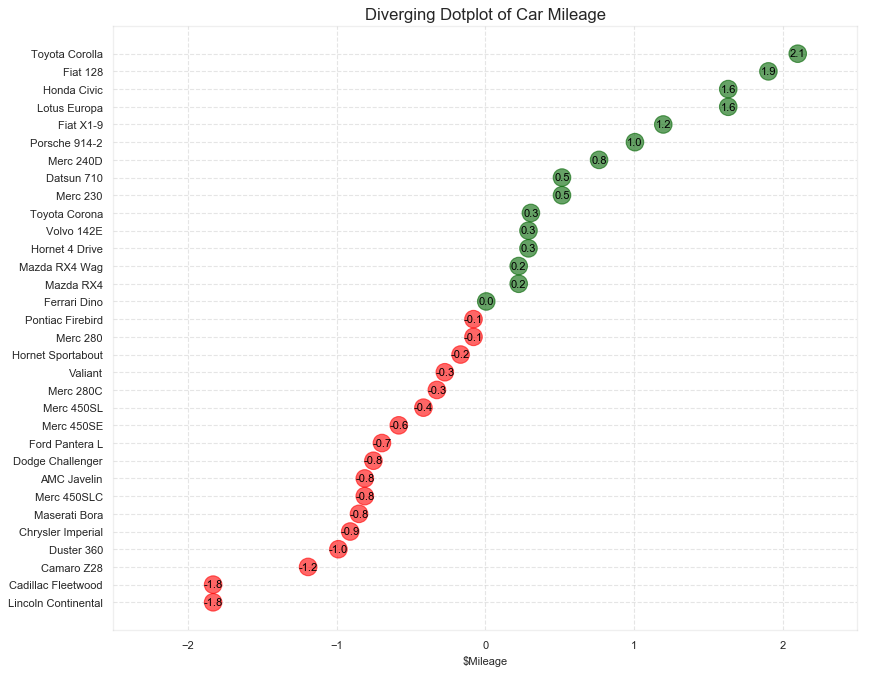

In [31]:
# Prepare Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(df.mpg_z, df.index, s=250, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x,
                 y,
                 round(tex, 1),
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontdict={'color': 'black','size': '10'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars,fontsize=10)
plt.xticks(fontsize=10)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size': 15})
plt.xlabel("$Mileage",fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
#plt.show()

## 3.5 带Marker的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）
使用不同形状，强调重点关注的数据区域。

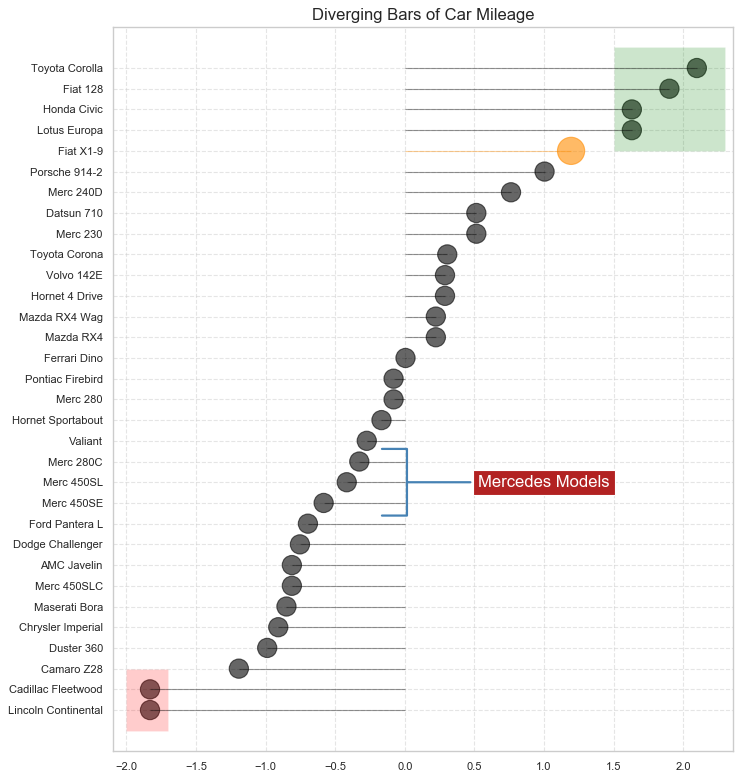

In [32]:
# Prepare Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(10, 12), dpi=80)
plt.hlines(y=df.index,
           xmin=0,
           xmax=df.mpg_z,
           color=df.colors,
           alpha=0.4,
           linewidth=1)
plt.scatter(df.mpg_z,
            df.index,
            color=df.colors,
            s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars],
            alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models',
             xy=(0.0, 11.0),
             xytext=(1.0, 11),
             xycoords='data',
             fontsize=15,
             ha='center',
             va='center',
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',
                             lw=2.0,
                             color='steelblue'),
             color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1),
                       width=.3,
                       height=3,
                       alpha=.2,
                       facecolor='red')
p2 = patches.Rectangle((1.5, 27),
                       width=.8,
                       height=5,
                       alpha=.2,
                       facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 15})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 3.6 面积图（Area Chart）
将曲线与坐标轴之间区域上色得面积图，面积图能够很好的展示整体与局部数据的关系，直观展示整体走势、展示不同元素的涨跌状况。



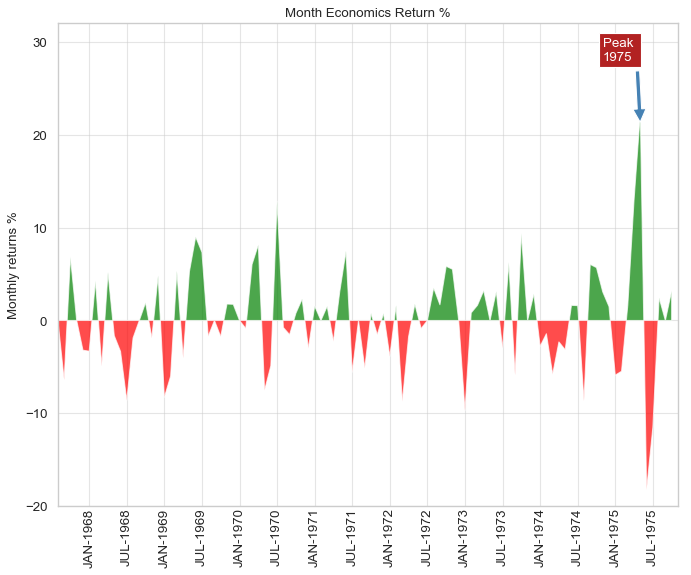

In [43]:
# Prepare Data
df = pd.read_csv("E:/git/python_Visualization-example/datasets/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) * 100

# Plot使用plt.fill_between
plt.figure(figsize=(10, 8), dpi=80)
plt.fill_between(x[1:],
                 y_returns[1:],
                 0,
                 where=y_returns[1:] >= 0,
                 facecolor='green',
                 interpolate=True,
                 alpha=0.7)
plt.fill_between(x[1:],
                 y_returns[1:],
                 0,
                 where=y_returns[1:] <= 0,
                 facecolor='red',
                 interpolate=True,
                 alpha=0.7)

# Annotate
plt.annotate('Peak \n1975',
             xy=(94.0, 21.0),
             xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05),
             fontsize=12,
             color='white')

# Decorations
xtickvals = [
    str(m)[:3].upper() + "-" + str(y)
    for y, m in zip(df.date.dt.year, df.date.dt.month_name())
]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6],
                          rotation=90,
                          fontdict={
                              'horizontalalignment': 'center',
                              'verticalalignment': 'baseline',
                              'size': 12,
                          })
plt.ylim(-20, 32)
plt.xlim(1, 100)
plt.yticks(fontsize=12)
plt.title("Month Economics Return %", fontsize=12)
plt.ylabel('Monthly returns %', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 3.3 排序 （Ranking）关系图

In [ ]:
##